In [3]:
# Headers
using DifferentialEquations
using PyPlot
include("helpers.jl")

dynsys_tensor_eigenvector

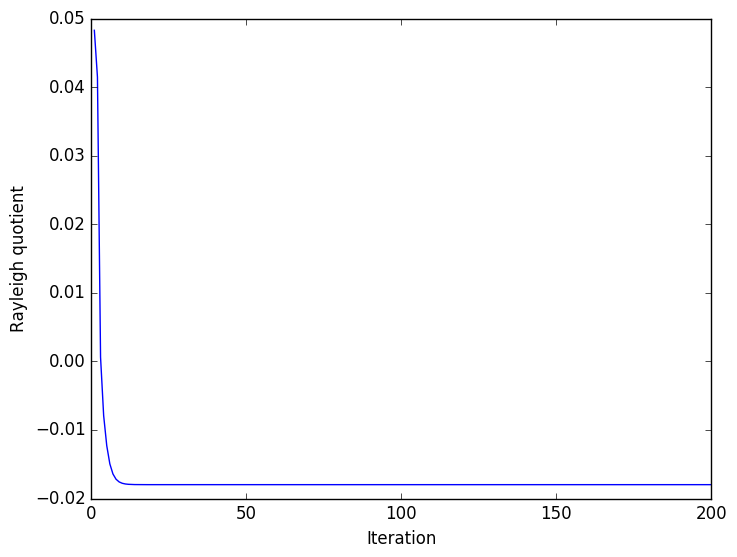

Starting Jacobian Eigenvalues:
Complex{Float64}[-0.474929+0.0im,-0.931796+0.524228im,-0.931796-0.524228im]
Ending Jacobian Eigenvalues:
Complex{Float64}[-0.978038+0.41926im,-0.978038-0.41926im,-2.9758+0.0im]
[-0.0179813]
[-0.713164,-0.509285,0.481689]


PyObject <matplotlib.text.Text object at 0x7fd61a0f7b90>

In [5]:
# Example Tensor Given in Literature

T = example_tensor();
srand(1) # for consistent results
histlam = zeros(0)

# Note that the Jacobian Starts off stable and ends stable
x, val = dynsys_tensor_eigenvector(T; f = x -> x, k=1, h=.5, histlam=histlam, multiplier=1)
println(val); println(x)
plot(1:NUMITERS, histlam[1:NUMITERS])
xlabel("Iteration"); ylabel("Rayleigh quotient")




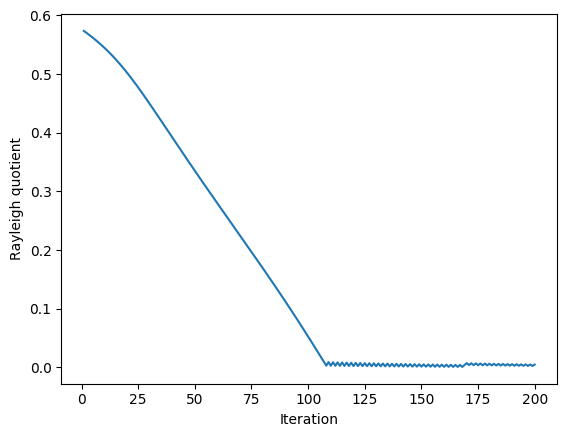

Starting Jacobian Eigenvalues:
[3.95392,-1.34411,-0.783331]
Ending Jacobian Eigenvalues:
Complex{Float64}[-8.432+0.0im,-0.552124+1.00683im,-0.552124-1.00683im]
[0.0046403]
[0.0529877,0.0390589,-0.465538]


PyObject <matplotlib.text.Text object at 0x7f00a457aa10>

In [5]:
# Random Symmetric Tensor

T = rand_symtensor(3);
srand(1) # for consistent results
ntrials = 5
histlam = zeros(0)

# Doesn't converge because stepsize is too high
x, val = dynsys_tensor_eigenvector(T; f = x -> x, k=2, h=.005, histlam=histlam)
println(val); println(x)
plot(1:NUMITERS, histlam[1:NUMITERS])
xlabel("Iteration"); ylabel("Rayleigh quotient")


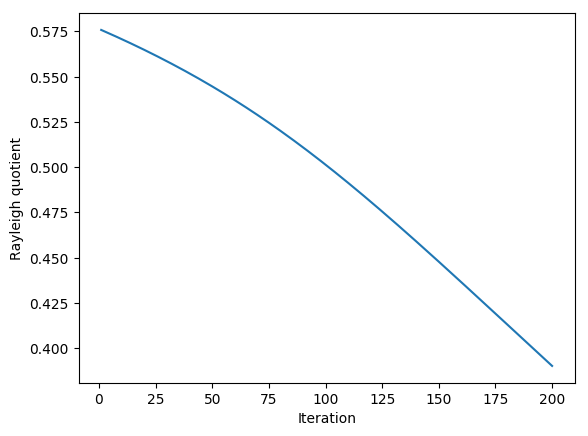

Starting Jacobian Eigenvalues:
[3.95392,-1.34411,-0.783331]
Ending Jacobian Eigenvalues:
[-0.342334,-0.639992,-2.50676]

[0.390193]
[0.259665,0.355614,-0.795076]


PyObject <matplotlib.text.Text object at 0x7f0a0634f610>

In [27]:
# Random Symmetric Tensor
srand(1) # for consistent results
histlam = zeros(0)

# Smaller Stepsize necessary due to stiffness of ODE?
x, val = dynsys_tensor_eigenvector(T; f = x -> x, k=2, h=.001, histlam=histlam)
println(val); println(x)
plot(1:NUMITERS, histlam[1:NUMITERS])
xlabel("Iteration"); ylabel("Rayleigh quotient")


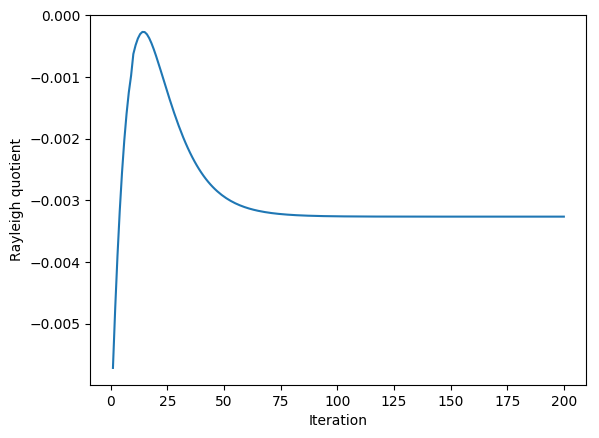

Starting Jacobian Eigenvalues:
Complex{Float64}[-3.93894+0.0im,-14.8426+12.2902im,-14.8426-12.2902im]
Ending Jacobian Eigenvalues:
Complex{Float64}[-23.0738+5.12243im,-23.0738-5.12243im,-56.2371+0.0im]
[-0.00326349]
[-0.447723,-0.77397,0.447787]


PyObject <matplotlib.text.Text object at 0x7f79b2daa790>

In [4]:
# Example Tensor Given in Literature

T = example_tensor();
srand(1) # for consistent results
histlam = zeros(0)

# Fast Convergence via multiplier... note the weird initial spike
x, val = dynsys_tensor_eigenvector(T; f = x -> x, k=2, h=.004, histlam=histlam, multiplier=20)
println(val)
println(x)
plot(1:NUMITERS, histlam[1:NUMITERS])
xlabel("Iteration"); ylabel("Rayleigh quotient")




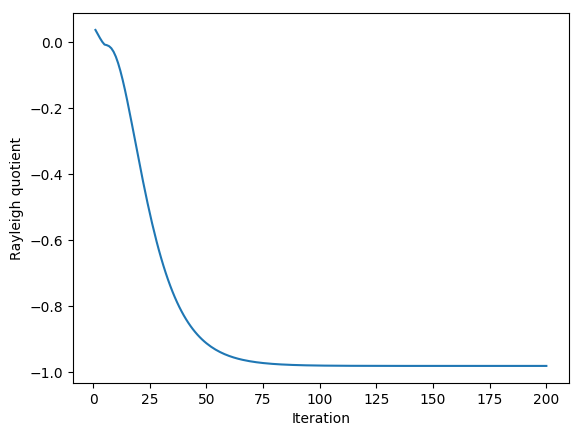

Starting Jacobian Eigenvalues:
[-0.199998,-0.200002,-0.2]
Ending Jacobian Eigenvalues:
Complex{Float64}[-0.200048+8.32595e-5im,-0.200048-8.32595e-5im,-0.199904+0.0im]

[-0.980115]
[-0.61111,-0.743735,-0.270924]


PyObject <matplotlib.text.Text object at 0x7fa212662990>

In [6]:
# Example Tensor Given in Literature

T = rand_tensor(3);
srand(1) # for consistent results
histlam = zeros(0)

# Much Convergence to same z-eigenpair via multiplier... note the weird initial spike
x, val = dynsys_tensor_eigenvector(T; f = x -> x, k=1, h=.4, histlam=histlam, multiplier=.2)
println("")
println(val)
println(x)
plot(1:NUMITERS, histlam[1:NUMITERS])
xlabel("Iteration")
ylabel("Rayleigh quotient")


